In [1]:
import sys
sys.path.append("..")

import matplotlib as mpl
mpl.rc_file("matplotlibrc_nntf")

In [2]:
from darkhistory.main import evolve
import darkhistory.physics as phys

solution = evolve(
    DM_process = 'decay',   # 'decay' or 'swave'
    mDM = 1e8,              # [eV]
    lifetime = 3e25,        # [s]
    primary = 'elec_delta', # primary decay channel
    start_rs = 3000,        # 1+z
    coarsen_factor = 12,    # log(1+z) would change by 0.001 * coarsen_factor for next step
    backreaction = True,    # Enable injection backreaction on matter temperature and ionization levels.
    helium_TLA = True,      # Enable Helium Three Level Atom (TLA).
    reion_switch = True,    # Enable a customizable reionization energy injection.
)

[2024-10-12 23:01:05,651] INFO: darkhistory.config: Loaded deposition transfer functions.
[2024-10-12 23:01:10,374] INFO: darkhistory.config: Loaded ICS transfer functions.
[2024-10-12 23:01:10,493] INFO: darkhistory.main: Starting evolution from rs = 3000.00 to rs = 4.00.
100%|██████████| 552/552 [02:27<00:00,  3.75it/s]


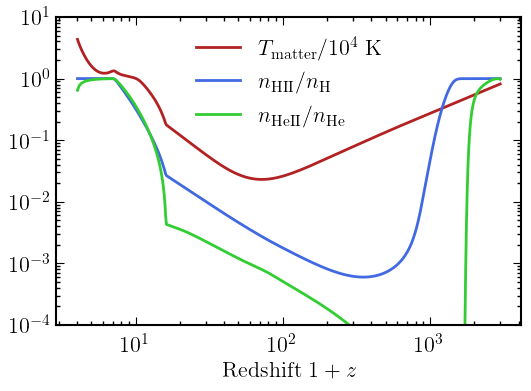

In [3]:
import matplotlib.pyplot as plt

plt.plot(solution['rs'], solution['Tm'] / (1e4*phys.kB), 'firebrick', label=r'$T_\mathrm{matter}/10^4$~K')
plt.plot(solution['rs'], solution['x'][:, 0], 'royalblue', label=r'$n_\mathrm{HII}/n_\mathrm{H}$')
plt.plot(solution['rs'], solution['x'][:, 1] / phys.chi, 'limegreen', label=r'$n_\mathrm{HeII}/n_\mathrm{He}$')
plt.xlabel(r'Redshift $1+z$')
plt.ylim(1e-4, 1e1)
plt.loglog()
plt.legend(frameon=False)

plt.savefig('example_run_results.png', dpi=300)